In [98]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../functions')
from model import get_unet
from data import load_data
from keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from metrics import f1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading The Data

In [14]:
x, y = load_data('../data/')

100%|██████████| 5088/5088 [00:02<00:00, 2070.72it/s]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Loading The Model

In [16]:
model = get_unet(input_shape = (128, 128, 3))

In [21]:
callbacks = [
    EarlyStopping(monitor='val_acc', patience=3, verbose=0)
]

## Fitting The Model

In [22]:
model.fit(x_train, y_train, validation_split = 0.166, epochs = 100, callbacks = callbacks)

Train on 2842 samples, validate on 566 samples
Epoch 1/100
2842/2842 [==============================] - 453s 159ms/step - loss: 2.3803 - acc: 0.8401 - val_loss: 2.6232 - val_acc: 0.8357
Epoch 2/100
2842/2842 [==============================] - 4646s 2s/step - loss: 1.0799 - acc: 0.9216 - val_loss: 1.5039 - val_acc: 0.9012
Epoch 3/100
2842/2842 [==============================] - 458s 161ms/step - loss: 0.6523 - acc: 0.9482 - val_loss: 1.2960 - val_acc: 0.9135
Epoch 4/100
2842/2842 [==============================] - 465s 163ms/step - loss: 0.5247 - acc: 0.9560 - val_loss: 0.9481 - val_acc: 0.9337
Epoch 5/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.4404 - acc: 0.9605 - val_loss: 0.7638 - val_acc: 0.9436
Epoch 6/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.3882 - acc: 0.9625 - val_loss: 0.6140 - val_acc: 0.9506
Epoch 7/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.3330 - acc: 0.9636 - val_loss: 0.4298 

## Saving The Weights

In [23]:
model.save_weights('../weights/unet_weights.h5')

# Evaluation
## Visualization The Predictions To Make Sure It Makes Sense

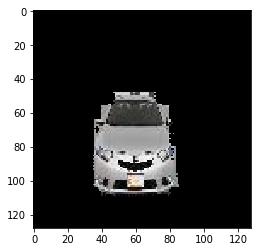

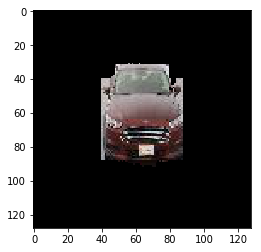

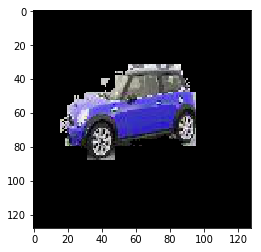

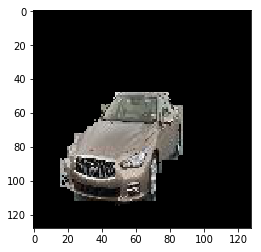

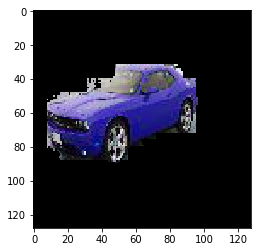

In [91]:
import numpy as np
im_nums = [2, 6, 5, 8, 10]
for im_num in im_nums:
    prediction = np.expand_dims(model.predict(x_train[im_num:im_num + 1])[0, :, :, 0] > .2, axis = 2)
    plt.imshow(np.multiply(x_train[im_num], np.concatenate([prediction for _ in range(3)], axis = 2)))
    plt.axis('off')
    plt.show()

## Evaluations

In [92]:
train_predictions = model.predict(x_train, verbose = 1)
test_predictions = model.predict(x_test, verbose = 1)

1680/1680 [==============================] - 91s 54ms/step


In [104]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print("Train F1: ", f1(y_train, (train_predictions > .5).astype('uint8')).eval())
    print("Test F1: ", f1(y_test, (test_predictions > .5).astype('uint8')).eval())

Train F1:  0.8764568
Test F1:  0.8305085
